In [103]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE

from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import accuracy_score

In [93]:
class trainer():

    def __init__(self, data, classifier, test_size, dim_reduction=None):
        self.data = data
        self.classifier = classifier
        self.test_size = test_size
        self.dim_reduction = dim_reduction
    
    def run(self, n_runs=10):
        acc = []
        for i in range(n_runs):
            
            X, y = self.data
            
            if self.dim_reduction:
                X = self.dim_reduction.fit_transform(X)
        
            if self.classifier.__class__.__name__ not in ("KMeans", "GaussianMixture"):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, stratify=y)
                self.classifier.fit(X_train, y_train)
                acc.append(self.classifier.score(X_test, y_test))
            else:
                self.classifier.fit(X)
                acc.append(accuracy_score(y, self.classifier.predict(X)))

        return np.mean(acc), np.std(acc)

In [100]:
data1 = load_digits(return_X_y=True)
data2 = fetch_openml(name='mfeat-pixel', version=1, return_X_y=True, as_frame=False)

pca = PCA(n_components=20, svd_solver='full')
classifiers = [
    Perceptron(tol=1e-3, random_state=0),
    RidgeClassifier(alpha=0.),
    MLPClassifier(random_state=1, max_iter=300),
    KNeighborsClassifier(n_neighbors=7),
    NearestCentroid(),
    QuadraticDiscriminantAnalysis(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    KMeans(n_clusters=10, random_state=0, n_init="auto"),
    GaussianMixture(n_components=10, random_state=0),
      ]

data_1_res = []
data_2_res = []

for clf in classifiers:
    trainer1 = trainer(data1, clf, 0.5, pca).run()
    trainer2 = trainer(data2, clf, 0.5, pca).run()
    data_1_res.append(trainer1)
    data_2_res.append(trainer2)

/home/hiroshi/anaconda3/envs/python_3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


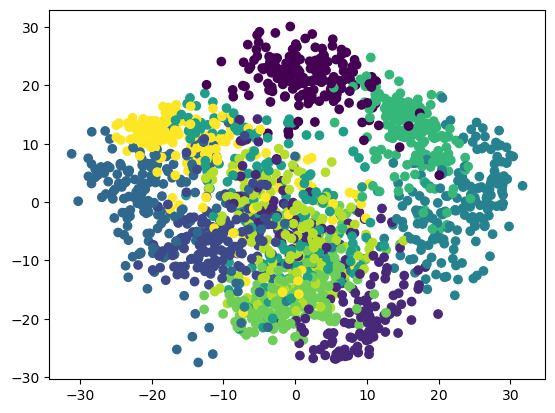

In [105]:
X,y = data1
pca = PCA(n_components=2, svd_solver='full')
X = pca.fit_transform(X)

plt.scatter(X[:,0], X[:,1],c=y)